In [28]:
import keras
from keras.datasets import mnist
from keras.layers import Dense
from keras.models import Sequential
from matplotlib import pyplot as plt
from random import randint

# Preparing the dataset
# Setup train and test splits
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Making a copy before flattening for the next code-segment which displays images
x_train_drawing = x_train

image_size = 784 # 28 x 28
x_train = x_train.reshape(x_train.shape[0], image_size) 
x_test = x_test.reshape(x_test.shape[0], image_size)

# Convert class vectors to binary class matrices
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

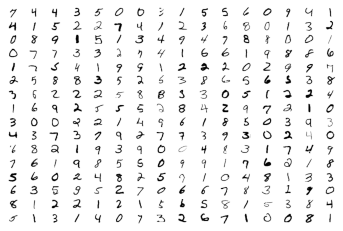

In [30]:
for i in range(256):
    ax = plt.subplot(16, 16, i+1)
    ax.axis('off')
    plt.imshow(x_train_drawing[randint(0, x_train.shape[0])], cmap='Greys')

In [31]:
model = Sequential()

# The input layer requires the special input_shape parameter which should match
# the shape of our training data.
model.add(Dense(units=32, activation='sigmoid', input_shape=(image_size,)))
model.add(Dense(units=num_classes, activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 32)                25120     
                                                                 
 dense_9 (Dense)             (None, 10)                330       
                                                                 
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


{'validation_data': None, 'model': <keras.engine.sequential.Sequential object at 0x7fa7ead03d30>, '_chief_worker_only': None, '_supports_tf_logs': False, 'history': {'loss': [1.4657773971557617, 0.9250827431678772, 0.7133391499519348, 0.5974372029304504, 0.5326020121574402], 'accuracy': [0.6288889050483704, 0.8184259533882141, 0.853592574596405, 0.8694259524345398, 0.8773703575134277], 'val_loss': [1.033705472946167, 0.7210261821746826, 0.5902632474899292, 0.4944138526916504, 0.4476563632488251], 'val_accuracy': [0.8234999775886536, 0.875, 0.8843333125114441, 0.8960000276565552, 0.9026666879653931]}, 'params': {'verbose': False, 'epochs': 5, 'steps': 422}, 'epoch': [0, 1, 2, 3, 4]}
0.49037083983421326


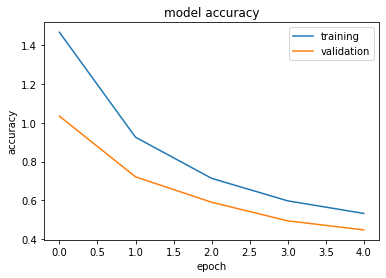

Test loss: 0.49
Test accuracy: 0.888


In [32]:
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=128, epochs=5, verbose=False, validation_split=.1)
loss, accuracy  = model.evaluate(x_test, y_test, verbose=False)

print(history.__dict__)
print(loss)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')